In [5]:
import GLPE
#https://github.com/ekehoe32/orthrus
import sys
sys.path.append('/home/katrina/a/mankovic/ZOETIS/Fall2021/Orthrus/orthrus')
import orthrus
from orthrus import core
from orthrus.core import dataset
import numpy as np
# from NetworkDataAnalysis import graph_tools_construction as gt
from matplotlib import pyplot as plt
import pandas
# from orthrus.core.pipeline import *
from sklearn.preprocessing import FunctionTransformer
from orthrus.preprocessing.imputation import HalfMinimum
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from orthrus.core.helper import load_object

In [2]:
#load incidence data
pathway_edges = pandas.read_csv('/data3/darpa/omics_databases/ensembl2pathway/reactome_human_pathway_edges.csv').dropna()

incidence_data = np.array(pathway_edges)[:,[2,4,5,7]]

node_ids = np.unique(incidence_data[:,:2])
translate_dict = { node_ids[i] :i  for i in range(len(node_ids))}
incidence_data[:,:2] = np.vectorize(translate_dict.get)(incidence_data[:,:2])

incidence_data

array([[4013, 1687, 'directed', 'R-HSA-1059683'],
       [4013, 1687, 'undirected', 'R-HSA-1059683'],
       [4013, 1594, 'directed', 'R-HSA-1059683'],
       ...,
       [7555, 1727, 'undirected', 'R-HSA-997272'],
       [7555, 1728, 'undirected', 'R-HSA-997272'],
       [7555, 1118, 'undirected', 'R-HSA-997272']], dtype=object)

In [5]:
my_clpe = GLPE.CLPE('degree', 'precomputed',incidence_data, heat_kernel_param = 2)
my_clpe

CLPE(centrality_measure='degree', heat_kernel_param=2.0,
     incidence_matrix=array([[4013, 1687, 'directed', 'R-HSA-1059683'],
       [4013, 1687, 'undirected', 'R-HSA-1059683'],
       [4013, 1594, 'directed', 'R-HSA-1059683'],
       ...,
       [7555, 1727, 'undirected', 'R-HSA-997272'],
       [7555, 1728, 'undirected', 'R-HSA-997272'],
       [7555, 1118, 'undirected', 'R-HSA-997272']], dtype=object),
     network_type='precomputed')

In [6]:
my_clpe.fit()

CLPE(centrality_measure='degree', heat_kernel_param=2.0,
     incidence_matrix=array([[4013, 1687, 'directed', 'R-HSA-1059683'],
       [4013, 1687, 'undirected', 'R-HSA-1059683'],
       [4013, 1594, 'directed', 'R-HSA-1059683'],
       ...,
       [7555, 1727, 'undirected', 'R-HSA-997272'],
       [7555, 1728, 'undirected', 'R-HSA-997272'],
       [7555, 1118, 'undirected', 'R-HSA-997272']], dtype=object),
     network_type='precomputed')

In [6]:
#load data
Z40_dataset = dataset.load_dataset('/data4/mankovic/De-Identified_CZ/DeId_TPM_C1_Z40_Z34.ds')
Z40_dataset.metadata = Z40_dataset.metadata.query("Project == 'Z40' & Treatment == 'High' & Timepoint == 0.0")
sidx = list(Z40_dataset.metadata.index)
Z40_dataset.data = Z40_dataset.data.loc[sidx]

#transform data (according to Kartikay)
transform = make_pipeline(HalfMinimum(missing_values=0), FunctionTransformer(np.log2))
Z40_dataset.normalize(transform, norm_name='HalfMinimum + Log2')
Z40_data = Z40_dataset.data

#which genes are in which pathways
pathway_data = pandas.read_csv('/data4/mankovic/De-Identified_CZ/deidentified_fcpw.csv')

#restrict pathway data to to genes that are actually there
pathway_data = pathway_data[['RandID']+list(Z40_data.columns)]


In [ ]:
incidence_data

In [19]:
n_nodes = len(nodes)

A = np.zeros((n_nodes, n_nodes))

for row in pathway_incidence:
    i = np.where(nodes == row[0])[0][0]
    j = np.where(nodes == row[1])[0][0]
    A[i, j] = 1
    if row[2] == 'undirected':
        A[j, i] = A[i, j].copy()

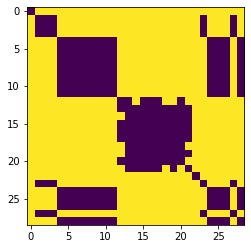